# Práctica 5

## Integrantes:


- García Saavedra Armando
- Mejía Yañez José Ehecatl
- Rodriguez Nuñez Diego Eduardo

***
# Introduccion

El problema de la mochila 0-1 consiste en seleccionar un conjunto de elementos, cada uno con un peso y un valor asociado, para colocarlos en una mochila de capacidad limitada. El objetivo es maximizar el valor total de los elementos seleccionados sin exceder la capacidad de la mochila. Se utiliza la programación dinámica para resolver este problema, construyendo una matriz que almacena los valores óptimos para subproblemas más pequeños. Al final, se obtiene el valor máximo y la lista de elementos seleccionados que logran ese valor máximo.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
def mochila_01_dp(pesos, valores, capacidad):
    n = len(pesos)
    dp = [[0] * (capacidad + 1) for _ in range(n + 1)]
    max_valores_dp = []  # Almacenar los valores máximos en cada iteración

    for i in range(1, n + 1):
        for j in range(1, capacidad + 1):
            if pesos[i - 1] <= j:
                dp[i][j] = max(dp[i - 1][j], valores[i - 1] + dp[i - 1][j - pesos[i - 1]])
            else:
                dp[i][j] = dp[i - 1][j]
        max_valores_dp.append(dp[i][capacidad])  # Almacenar el valor máximo en cada iteración

    seleccionados = []
    i, j = n, capacidad
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            seleccionados.append(i - 1)
            j -= pesos[i - 1]
        i -= 1

    seleccionados.reverse()
    return dp[n][capacidad], seleccionados, max_valores_dp

def mochila_01_greedy(pesos, valores, capacidad):
    n = len(pesos)
    ratio = [(valores[i] / pesos[i], i) for i in range(n)]
    ratio.sort(reverse=True, key=lambda x: x[0])

    seleccionados = []
    peso_actual = 0
    valor_total = 0
    max_valores_greedy = []  # Almacenar los valores máximos en cada iteración

    for r, idx in ratio:
        if peso_actual + pesos[idx] <= capacidad:
            seleccionados.append(idx)
            peso_actual += pesos[idx]
            valor_total += valores[idx]
        max_valores_greedy.append(valor_total)  # Almacenar el valor máximo en cada iteración

    return valor_total, seleccionados, max_valores_greedy

# Datos de entrada
pesos = [50, 100, 125, 280, 300]
valores = [60, 100, 120, 200, 240]
capacidad_mochila = 500

# Solución utilizando programación dinámica (DP)
max_valor_dp, items_seleccionados_dp, max_valores_dp = mochila_01_dp(pesos, valores, capacidad_mochila)

# Solución utilizando greedy
max_valor_greedy, items_seleccionados_greedy, max_valores_greedy = mochila_01_greedy(pesos, valores, capacidad_mochila)

***
# Graficación y tabulación

Creamos el dataframe

In [28]:
# Crear DataFrame con los valores máximos en cada iteración
data = {
    'Peso': pesos,
    'Valor máximo (DP)': max_valores_dp,
    'Valor máximo (Greedy)': max_valores_greedy
}
df = pd.DataFrame(data)
df

,Peso,Valor máximo (DP),Valor máximo (Greedy)
0,50,60,60
1,100,160,160
2,125,280,280
3,280,380,280
4,300,420,280


y graficamos

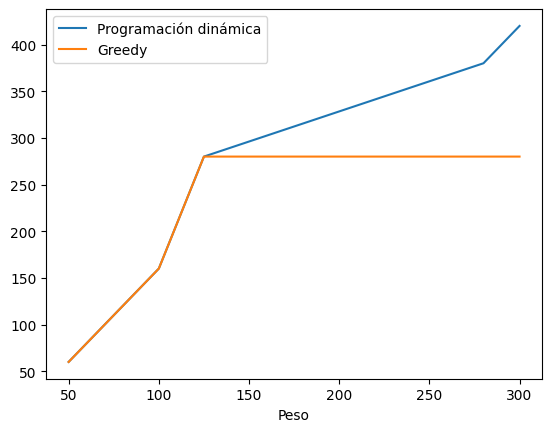

In [29]:
plt.plot(df['Peso'], df['Valor máximo (DP)'], label='Programación dinámica')
plt.plot(df['Peso'], df['Valor máximo (Greedy)'], label='Greedy')
plt.xlabel('Peso')
plt.legend()
plt.show()

***
# Conclusion


En resumen, el problema de la mochila 0-1 se puede abordar utilizando dos enfoques: programación dinámica y greedy.

La programación dinámica garantiza una solución óptima, ya que evalúa todas las posibles combinaciones y elige la mejor opción en cada paso. Sin embargo, este enfoque puede ser más computacionalmente costoso debido a la construcción de una matriz y los cálculos adicionales requeridos. Es adecuado cuando se busca la solución más óptima y no hay restricciones de tiempo.

Por otro lado, el enfoque greedy es más rápido, pero no garantiza una solución óptima en todos los casos. Se basa en tomar decisiones locales óptimas en cada paso, seleccionando el elemento con la mejor relación valor-peso en ese momento. Este enfoque es útil cuando se necesita una solución rápida y aproximada, y las restricciones de tiempo son importantes.

La elección entre programación dinámica y greedy depende de los requisitos específicos del problema. Si se requiere una solución óptima y se dispone de suficiente capacidad computacional, la programación dinámica es preferible. Por otro lado, si el tiempo de ejecución es un factor crítico y una solución aproximada es aceptable, el enfoque greedy puede ser más adecuado.

En última instancia, la elección del enfoque debe considerar las restricciones de tiempo, la precisión requerida y el tamaño del problema. Cada enfoque tiene sus ventajas y limitaciones, y la mejor opción dependerá de las necesidades específicas de cada situación.